In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.auto import tqdm
from torchvision.utils import save_image


In [2]:
print(f"PyTorch Version: {torch.__version__}")
if torch.cuda.is_available():
    device = torch.device("cuda")
    device_name = torch.cuda.get_device_name(0)
    properties = torch.cuda.get_device_properties(0)
    compute_capability = f"{properties.major}.{properties.minor}"
    total_memory = properties.total_memory / 1024**3

    print(f"CUDA Device: {device_name}")
    print(f"CUDA Compute Capability: {compute_capability}")
    print(f"Total Memory: {total_memory:.2f} GB")
else:
    device = torch.device("cpu")
    print("GPU is not available")

PyTorch Version: 2.2.1
CUDA Device: NVIDIA GeForce RTX 4070 Ti SUPER
CUDA Compute Capability: 8.9
Total Memory: 15.70 GB


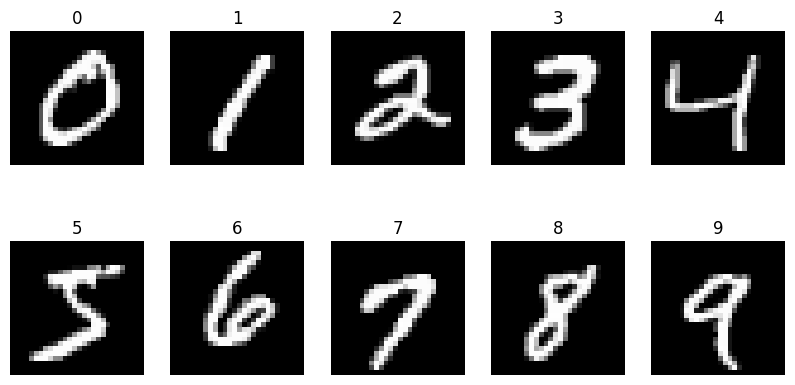

In [3]:
# load MNIST dataset from utils
from utils import get_dataset

(
    channel,
    im_size,
    num_classes,
    class_names,
    mean,
    std,
    train_MNIST_dataset,
    test_MNIST_dataset,
    test_MNIST_dataloader,
    train_MNIST_dataloader,
) = get_dataset("MNIST", "../datasets")

# visualize 10 classes of MNIST (2 by 5)
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(
        train_MNIST_dataset.data[train_MNIST_dataset.targets == i][0], cmap="gray"
    )
    ax.set_title(f"{i}")
    ax.axis("off")

In [4]:
from utils import get_network

ConvNet3 = get_network('ConvNetD3', channel, num_classes, im_size)
print(ConvNet3)

ConvNet(
  (features): Sequential(
    (0): Conv2d(1, 128, kernel_size=(3, 3), stride=(1, 1), padding=(3, 3))
    (1): GroupNorm(128, 128, eps=1e-05, affine=True)
    (2): ReLU(inplace=True)
    (3): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): GroupNorm(128, 128, eps=1e-05, affine=True)
    (6): ReLU(inplace=True)
    (7): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (8): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): GroupNorm(128, 128, eps=1e-05, affine=True)
    (10): ReLU(inplace=True)
    (11): AvgPool2d(kernel_size=2, stride=2, padding=0)
  )
  (classifier): Linear(in_features=2048, out_features=10, bias=True)
)


In [ ]:
n_epochs = 2
lr = 0.01
criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(ConvNet3.parameters(), lr=lr)

for epoch in range(n_epochs):
    ConvNet3.train()
    running_loss = 0.0
    progress_bar = tqdm(
        enumerate(train_MNIST_dataloader, 0),
        total=len(train_MNIST_dataloader),
        desc=f"Epoch {epoch+1}",
    )

    total_iterations = len(train_MNIST_dataloader)
    for i, data in enumerate(train_MNIST_dataloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = ConvNet3(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        percentage_complete = (i + 1) / total_iterations * 100
        progress_bar.set_postfix(loss=running_loss / (i + 1))
        progress_bar.update(1)



In [29]:
import main_DataDAM
import sys

sys.argv = [
    'main_DataDAM.py',
    '--model', 'ConvNetD3',
    #'--dataset', 'MNIST',
    '--data_path', '../datasets',
    '--save_path', '../output',
    '--num_eval', '5',
]

main_DataDAM.main()

eval_it_pool:  [0]
Files already downloaded and verified
Files already downloaded and verified

================== Exp 0 ==================
 
Hyper-parameters: 
 {'dataset': 'CIFAR10', 'model': 'ConvNetD3', 'ipc': 10, 'eval_mode': 'SS', 'num_exp': 1, 'num_eval': 5, 'epoch_eval_train': 1, 'Iteration': 10, 'lr_img': 1, 'lr_net': 0.01, 'batch_real': 256, 'batch_train': 256, 'init': 'real', 'dsa_strategy': 'none', 'data_path': '../datasets', 'zca': False, 'save_path': '../output', 'task_balance': 0.01, 'method': 'DataDAM', 'device': 'cuda', 'dsa_param': <utils.ParamDiffAug object at 0x7f5314a99c30>, 'dsa': False}
Evaluation model pool:  ['ConvNetD3']
class c = 0: 5000 real images
class c = 1: 5000 real images
class c = 2: 5000 real images
class c = 3: 5000 real images
class c = 4: 5000 real images
class c = 5: 5000 real images
class c = 6: 5000 real images
class c = 7: 5000 real images
class c = 8: 5000 real images
class c = 9: 5000 real images
real images channel 0, mean = -0.0000, std = 

/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


torch.Size([100, 1, 28, 28])


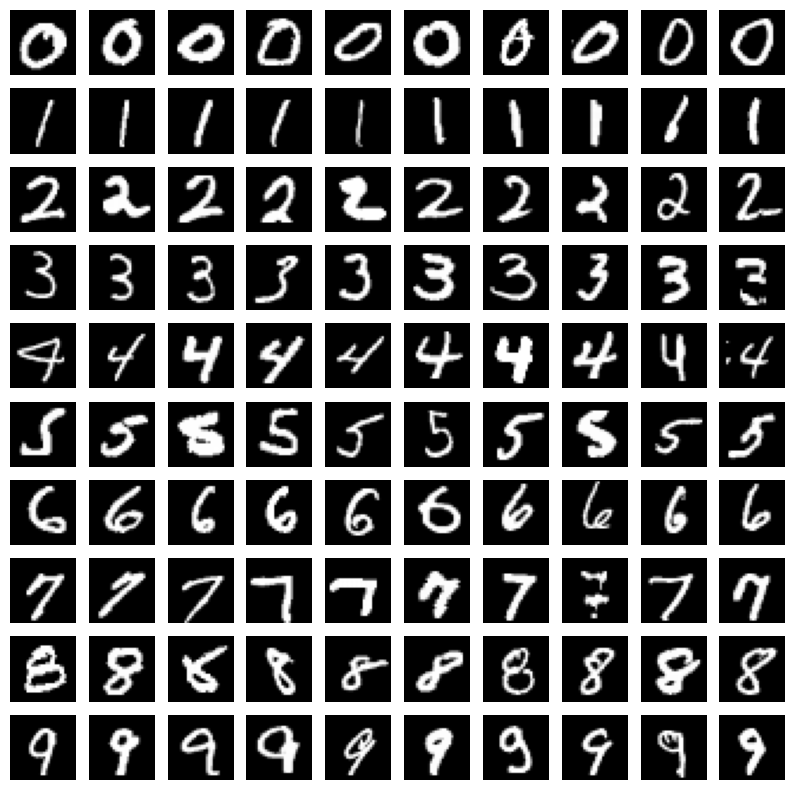

In [28]:
# load the results images
file = '../output/res_DataDAM_MNIST_ConvNetD3_10ipc_.pt'
file = '../output/res_DataDAM_CIFAR10_ConvNetD3_10ipc_.pt'
# plot the results
results = torch.load(file)
syn_imgs = results['data'][0][0]

print(syn_imgs.shape) # = (100, 1, 28, 28)
# 
# 10 images per class
fig, axes = plt.subplots(10, 10, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(syn_imgs[i].permute(1, 2, 0).squeeze(), cmap="gray")
    ax.axis("off")